## Cours : Projet de synthèse (420-A62-BB)  	
## Enseignante : Hafed Benteftifa Ph. D. & Islem Saidani Ph. D.

## Coéquipiers:
###    • M’Hamed Ben Cherqui (2123200)
###    • El Hassan Aouzah (1696036)
 

## Cahier de Charges – Équipe 04
## Version 3.0 – 01 Decembre 2022


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn import metrics 

In [2]:
#les noms de colonnes du dataset sont les suivants (s pour sensor):
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
             's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [3]:
#Charger les données de training
df_train = pd.read_csv('../data/raw/train_FD001.txt', sep = ' ', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
#supprimer les colonnes 26 et 27 (deux espaces de trop)
df_train.drop([26,27], axis=1, inplace=True)
#Ajouter les noms de colonnes
df_train.columns = col_names
cut_test=df_train.copy()
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
# Vérfier s'il y des valeurs manquantes
df_train.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [6]:
# Vérifier les types de données (toutes est numérique)
df_train.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

In [7]:
max_cycle = pd.DataFrame(df_train[['id','cycle']].groupby('id').max())
print(max_cycle)

     cycle
id        
1      192
2      287
3      179
4      189
5      269
..     ...
96     336
97     202
98     156
99     185
100    200

[100 rows x 1 columns]


<AxesSubplot:ylabel='Count'>

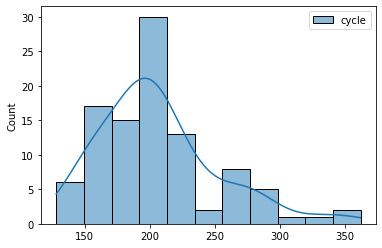

In [8]:
# Peu de emoteurs peuvent aller au dela de 300 cycles, la grande majorité atteint 200 cycles 
#
sns.histplot(max_cycle, kde=True) 

In [9]:
# Vérifier quelques  statistiques pour les settings
# l'écart type de setting3 est à 0 et ceux de setting1 et setting2 sont faibles
# Devrions-nous supprimer ces settings? 
print(df_train[['setting1','setting2','setting3']].describe())

           setting1      setting2  setting3
count  20631.000000  20631.000000   20631.0
mean      -0.000009      0.000002     100.0
std        0.002187      0.000293       0.0
min       -0.008700     -0.000600     100.0
25%       -0.001500     -0.000200     100.0
50%        0.000000      0.000000     100.0
75%        0.001500      0.000300     100.0
max        0.008700      0.000600     100.0


In [10]:
# Les écarts type des sensors s1,s5,s6,s10,s16,s18 et s19 sont tous à 0
# Devrions-nous supprimer ces sensors?
sensors = df_train[['s{}'.format(i) for i in range(1,22)]]
print(sensors.describe().transpose().round(2))

       count     mean    std      min      25%      50%      75%      max
s1   20631.0   518.67   0.00   518.67   518.67   518.67   518.67   518.67
s2   20631.0   642.68   0.50   641.21   642.33   642.64   643.00   644.53
s3   20631.0  1590.52   6.13  1571.04  1586.26  1590.10  1594.38  1616.91
s4   20631.0  1408.93   9.00  1382.25  1402.36  1408.04  1414.55  1441.49
s5   20631.0    14.62   0.00    14.62    14.62    14.62    14.62    14.62
s6   20631.0    21.61   0.00    21.60    21.61    21.61    21.61    21.61
s7   20631.0   553.37   0.89   549.85   552.81   553.44   554.01   556.06
s8   20631.0  2388.10   0.07  2387.90  2388.05  2388.09  2388.14  2388.56
s9   20631.0  9065.24  22.08  9021.73  9053.10  9060.66  9069.42  9244.59
s10  20631.0     1.30   0.00     1.30     1.30     1.30     1.30     1.30
s11  20631.0    47.54   0.27    46.85    47.35    47.51    47.70    48.53
s12  20631.0   521.41   0.74   518.69   520.96   521.48   521.95   523.38
s13  20631.0  2388.10   0.07  2387.88 

In [11]:
# Étant donné que le dernier cycle représent de temps ou le moteur ne fonctionne plus, on peut ainsi déterminer le RUL
# Le RUL (Remaining Useful Life) est le temps (en terme de cycle) restant avant l'arrêt du moteur.
# 
to_drop = ['cycle','setting1','setting2','setting3','s1','s5','s6','s10','s16','s18','s19']
max_cycle.reset_index(level=0, inplace=True)
max_cycle.columns = ['id', 'last_cycle']
#print(max_cycle)
df_train = pd.merge(df_train, max_cycle, on='id')
df_train['RUL'] = df_train['last_cycle'] - df_train['cycle']
df_train.drop(to_drop+['last_cycle'], axis=1, inplace=True)

print(df_train)


        id      s2       s3       s4      s7       s8       s9    s11     s12  \
0        1  641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47  521.66   
1        1  642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49  522.28   
2        1  642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27  522.42   
3        1  642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13  522.86   
4        1  642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28  522.19   
...    ...     ...      ...      ...     ...      ...      ...    ...     ...   
20626  100  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07  519.49   
20627  100  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04  519.68   
20628  100  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09  520.01   
20629  100  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39  519.67   
20630  100  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20  519.30   

           s13      s14    

<AxesSubplot:>

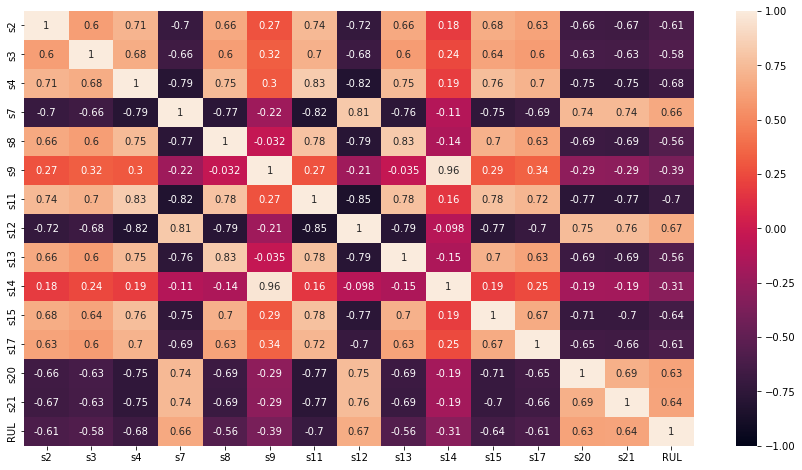

In [12]:
f = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']
z_corr = pd.DataFrame(df_train,columns = f+['RUL'])
plt.figure(figsize=(15,8))
sns.heatmap(z_corr.corr(), vmin=-1, vmax=1, annot=True)

In [13]:
#sns.pairplot(z_corr,diag_kind='kde')
#plt.figure(figsize=(20,20))

In [14]:
#Charger les données de test
df_test = pd.read_csv('../data/raw/test_FD001.txt', sep = ' ', header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [15]:
#supprimer les colonnes 26 et 27 (deux espaces de trop)
df_test.drop([26,27], axis=1, inplace=True)
#Ajouter les noms de colonnes
df_test.columns = col_names
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [16]:
# Vérfier s'il y des valeurs manquantes
df_test.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [17]:
# Vérifier les types de données (toutes est numérique)
df_train.dtypes

id       int64
s2     float64
s3     float64
s4     float64
s7     float64
s8     float64
s9     float64
s11    float64
s12    float64
s13    float64
s14    float64
s15    float64
s17      int64
s20    float64
s21    float64
RUL      int64
dtype: object

In [18]:
# Vérifier certains valeurs  statistiques
# l'écart type de setting3 est à 0 et ceux de setting1 et setting2 sont faibles
#Les écarts type des sensors s1,s5,s6,s10,s16,s18 et s19 sont tous à 0
# On va les supprimer comme le dataset du training
df_test.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
id,13096.0,51.544,28.289,1.000,28.000,52.000,76.000,100.000
cycle,13096.0,76.837,53.058,1.000,33.000,69.000,113.000,303.000
setting1,13096.0,-0.000,0.002,-0.008,-0.002,-0.000,0.002,0.008
setting2,13096.0,0.000,0.000,-0.001,-0.000,-0.000,0.000,0.001
setting3,13096.0,100.000,0.000,100.000,100.000,100.000,100.000,100.000
s1,13096.0,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s2,13096.0,642.475,0.401,641.130,642.198,642.460,642.740,644.300
s3,13096.0,1588.099,5.003,1569.040,1584.600,1587.990,1591.362,1607.550
s4,13096.0,1404.735,6.688,1384.390,1399.950,1404.440,1409.050,1433.360
s5,13096.0,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [19]:
t_max_cycle = pd.DataFrame(df_test[['id','cycle']].groupby('id').max())
to_drop = ['cycle','setting1','setting2','setting3','s1','s5','s6','s10','s16','s18','s19']
t_max_cycle.reset_index(level=0, inplace=True)
t_max_cycle.columns = ['id', 'last_cycle']
print(t_max_cycle)


     id  last_cycle
0     1          31
1     2          49
2     3         126
3     4         106
4     5          98
..  ...         ...
95   96          97
96   97         134
97   98         121
98   99          97
99  100         198

[100 rows x 2 columns]


In [20]:
#Preparer / merger les données de test et truth
df_truth = pd.read_csv('../data/raw/RUL_FD001.txt', sep = ' ', header=None)
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns=['more']
df_truth['id']=df_truth.index+1
df_truth['t_last']=df_truth['more']+t_max_cycle['last_cycle']
df_truth.drop(['more'], axis=1, inplace=True)
df_truth

,id,t_last
0,1,143
1,2,147
2,3,195
3,4,188
4,5,189
...,...,...
95,96,234
96,97,216
97,98,180
98,99,214


In [21]:
df_test = pd.merge(df_test, df_truth, on='id')
df_test['RUL'] = df_test['t_last'] - df_test['cycle']
df_test.drop(to_drop+['t_last'], axis=1, inplace=True)
print(df_test.round(3))
#print(df_test[:50])
#df_test.groupby('id').last().reset_index()

        id      s2       s3       s4      s7       s8       s9    s11     s12  \
0        1  643.02  1585.29  1398.21  553.90  2388.04  9050.17  47.20  521.72   
1        1  641.71  1588.45  1395.42  554.85  2388.01  9054.42  47.50  522.16   
2        1  642.46  1586.94  1401.34  554.11  2388.05  9056.96  47.50  521.97   
3        1  642.44  1584.12  1406.42  554.07  2388.03  9045.29  47.28  521.38   
4        1  642.51  1587.19  1401.92  554.16  2388.01  9044.55  47.31  522.15   
...    ...     ...      ...      ...     ...      ...      ...    ...     ...   
13091  100  643.24  1599.45  1415.79  553.41  2388.02  9142.37  47.69  520.69   
13092  100  643.22  1595.69  1422.05  553.22  2388.05  9140.68  47.60  521.05   
13093  100  643.44  1593.15  1406.82  553.04  2388.11  9146.81  47.57  521.18   
13094  100  643.26  1594.99  1419.36  553.37  2388.07  9148.85  47.61  521.33   
13095  100  642.95  1601.62  1424.99  552.48  2388.06  9155.03  47.80  521.07   

           s13      s14    

[(190.0, 0.0)]

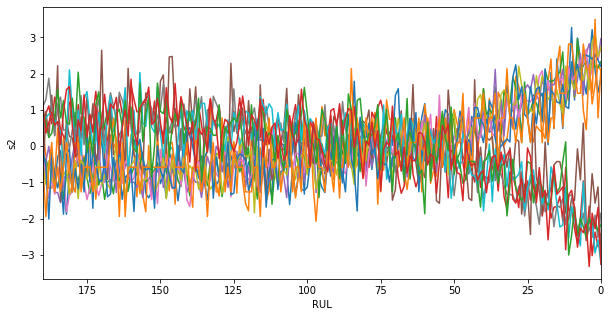

In [22]:
#explore the engine i to see all selected sensors beheavior
t = df_train[df_train['id']==1].copy() 
#normalize
Z =t[f]
scaler = StandardScaler().fit(Z.values)
Z = scaler.transform(Z.values)
t[f]=Z
#plot
plt.figure(figsize=(10,5))
for i in f:
    p=sns.lineplot(x=t.RUL, y=t[i])

p.set(xlim=(190, 0))

In [23]:
#normalize df_train and df_test science all sensos series have normal distribution
train_data = df_train.copy() 
 
test_data = df_test.copy()
#normalize train_data
train_data_n =train_data[f]
scaler = StandardScaler().fit(train_data_n.values)
train_data_n = scaler.transform(train_data_n.values)
train_data[f]=train_data_n

test_data = test_data.groupby('id').last().reset_index() # test_data is 13096 and train_data 20631, so i regrouped by id here
#normalize test_data
test_data_n =test_data[f]
#scaler = StandardScaler().fit(test_data_n.values) # do not fit test data
test_data_n = scaler.transform(test_data_n.values)
test_data[f]=test_data_n

train_data
train_data_cut = train_data.copy() 
test_data_cut=test_data.copy()

In [24]:
# ready data to use in modeles
X_train = train_data.drop(['id','RUL'],axis=1)
y_train = train_data.pop('RUL')
X_test = test_data.drop(['id','RUL'],axis=1)
y_test = test_data.pop('RUL')
X_test

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.201850,-1.517390,-1.113706,1.188932,-0.234584,-0.400453,-1.165071,0.510525,-0.502695,-0.715188,-1.059765,-0.136018,-0.034694,0.605041
1,-0.261846,-0.641513,0.210682,0.172064,0.047171,-0.927118,0.482370,0.442731,-0.085548,-0.883465,0.222760,-1.427402,-0.034694,-0.257790
2,0.398100,-0.126100,1.106199,-0.878699,0.892435,-0.723788,1.268649,-0.791108,0.609696,-0.644417,-0.806460,1.155367,0.629236,-0.145087
3,0.198117,0.653544,-0.228188,-0.822207,0.469803,-0.631407,0.407486,0.632553,0.192549,-0.530136,0.566722,1.155367,-1.307226,-0.291971
4,-0.821799,-0.095110,1.158419,-0.087802,0.047171,-0.509590,-0.303908,-0.560610,0.748745,-0.944275,-0.158531,0.509675,-0.366659,1.126989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.761804,0.058209,-1.221479,0.703095,-0.938970,-0.128290,-1.502047,1.202017,-1.197939,0.235235,-0.830457,-1.427402,0.795218,1.578729
96,-0.181852,-1.233586,0.220681,0.770886,-0.516338,0.503437,-0.603443,0.225792,-0.502695,0.614775,0.209428,1.155367,-1.141243,0.051683
97,-0.001867,1.465810,0.726215,0.081676,0.469803,-0.131460,0.444928,0.157999,-0.085548,0.138253,-0.497161,0.509675,-0.311331,0.656774
98,-1.361755,-0.895958,-1.217035,1.561783,-1.220725,0.086814,-1.052745,0.551201,-1.058890,0.347420,-1.115759,-1.427402,0.739891,0.644765


In [25]:
def metricss(ytest,predicttest):
   mse = metrics.mean_squared_error(ytest,predicttest)
   print('RMSE test_data : ',np.sqrt(mse))
   print('R_2 test_data  : ',metrics.r2_score(ytest,predicttest)) 

In [26]:
def linear_m(X_train,y_train,X_test,y_test):
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    predict_test=lm.predict(X_test)
    metricss(y_test,predict_test)

In [27]:
#polynomial model
def poly_m(X_train,y_train,X_test,y_test):
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    polyreg = linear_model.LinearRegression()
    polyreg.fit(X_train_poly, y_train)
    y_test_predict = polyreg.predict(X_test_poly)
    metricss(y_test,y_test_predict)

In [28]:
#random forest model
def random_f(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor(n_estimators=50, max_features=3, max_depth=4, n_jobs=-1, random_state=1)
    rf.fit(X_train, y_train)
    y_test_predict = rf.predict(X_test)
    metricss(y_test,y_test_predict)

In [29]:
#Support vector regressor model
def support_v(X_train,y_train,X_test,y_test):
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train,y_train)
    y_test_predict = regressor.predict(X_test)
    metricss(y_test,y_test_predict)

In [30]:
#print("Linear model: -------------------------")
#linear_m(X_train,y_train,X_test,y_test)
#print("polynomial model: ---------------------")
#poly_m(X_train,y_train,X_test,y_test)
#print("random_f: -----------------------------")
#random_f(X_train,y_train,X_test,y_test)
#print("support vect: -------------------------")
#support_v(X_train,y_train,X_test,y_test)

In [31]:
#nouvelle approche : couper la partie droite des donnee et concerver seulement la partie courbee
#exemple reacteur 1
#bb=cut_test.iloc[:191].copy()
#plt.figure(figsize=(20,6))
#sns.lineplot(x=bb.cycle,y=bb.s12)

In [32]:
train_data_cut = train_data_cut[125 > train_data_cut['RUL']]
X_train_cut = train_data_cut.drop(['id','RUL'],axis=1)
y_train_cut = train_data_cut.pop('RUL')
X_test_cut = test_data_cut.drop(['id','RUL'],axis=1)
y_test_cut = test_data_cut.pop('RUL')

In [33]:
X_test_cut

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.201850,-1.517390,-1.113706,1.188932,-0.234584,-0.400453,-1.165071,0.510525,-0.502695,-0.715188,-1.059765,-0.136018,-0.034694,0.605041
1,-0.261846,-0.641513,0.210682,0.172064,0.047171,-0.927118,0.482370,0.442731,-0.085548,-0.883465,0.222760,-1.427402,-0.034694,-0.257790
2,0.398100,-0.126100,1.106199,-0.878699,0.892435,-0.723788,1.268649,-0.791108,0.609696,-0.644417,-0.806460,1.155367,0.629236,-0.145087
3,0.198117,0.653544,-0.228188,-0.822207,0.469803,-0.631407,0.407486,0.632553,0.192549,-0.530136,0.566722,1.155367,-1.307226,-0.291971
4,-0.821799,-0.095110,1.158419,-0.087802,0.047171,-0.509590,-0.303908,-0.560610,0.748745,-0.944275,-0.158531,0.509675,-0.366659,1.126989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.761804,0.058209,-1.221479,0.703095,-0.938970,-0.128290,-1.502047,1.202017,-1.197939,0.235235,-0.830457,-1.427402,0.795218,1.578729
96,-0.181852,-1.233586,0.220681,0.770886,-0.516338,0.503437,-0.603443,0.225792,-0.502695,0.614775,0.209428,1.155367,-1.141243,0.051683
97,-0.001867,1.465810,0.726215,0.081676,0.469803,-0.131460,0.444928,0.157999,-0.085548,0.138253,-0.497161,0.509675,-0.311331,0.656774
98,-1.361755,-0.895958,-1.217035,1.561783,-1.220725,0.086814,-1.052745,0.551201,-1.058890,0.347420,-1.115759,-1.427402,0.739891,0.644765


In [34]:
#print("Linear model: -------------------------")
#linear_m(X_train_cut,y_train_cut,X_test_cut,y_test_cut)
#print("polynomial model: ---------------------")
#poly_m(X_train_cut,y_train_cut,X_test_cut,y_test_cut)
#print("random_f: -----------------------------")
#random_f(X_train_cut,y_train_cut,X_test_cut,y_test_cut)
#print("support vect: -------------------------")
#support_v(X_train_cut,y_train_cut,X_test_cut,y_test_cut)

In [35]:
#X_test.iloc[[53]]

In [36]:
#y_test.iloc[0]

In [37]:
#lm = linear_model.LinearRegression()
#lm.fit(X_train,y_train)

In [38]:
#predict_test=lm.predict(X_test.iloc[[53]])
#print('Predicted: ',round(predict_test[0],3),'Real: ',y_test.iloc[53])

In [39]:
#lm_cut = linear_model.LinearRegression()
#lm_cut.fit(X_train_cut,y_train_cut)

In [40]:
import pickle

In [41]:
#filename = "modelentraine.pickle"
#with open(filename, 'wb') as file:
#    pickle.dump(lm_cut, file)

In [42]:
#predict_test=lm_cut.predict(X_test_cut.iloc[[53]])
#print('Predicted: ',round(predict_test[0],3),'Real: ',y_test_cut.iloc[53])

In [43]:
with open('../models/modelentraine.pickle', 'rb') as f:
    lm_cut02 = pickle.load(f)

In [44]:
#predict_test=lm_cut02.predict(X_test_cut.iloc[[53]])
#print('Predicted with lm_cut02: ',round(predict_test[0],3),'Real: ',y_test_cut.iloc[53])

In [ ]:
from flask import Flask
from flask import render_template

from flask_wtf import FlaskForm
from wtforms   import SubmitField, StringField, IntegerField,FloatField
from wtforms.validators import DataRequired

from flask import flash

from werkzeug.utils import redirect

class ProjetForm(FlaskForm):
    s2          = FloatField("Predicteur  s2:"   , validators=[DataRequired()])
    s3          = FloatField("Predicteur  s3:"   , validators=[DataRequired()])
    s4          = FloatField("Predicteur  s4:"   , validators=[DataRequired()])
    s7          = FloatField("Predicteur  s7:"   , validators=[DataRequired()])
    s8          = FloatField("Predicteur  s8:"   , validators=[DataRequired()])
    s9          = FloatField("Predicteur  s9:"   , validators=[DataRequired()])
    s11         = FloatField("Predicteur s11:"   , validators=[DataRequired()])
    s12         = FloatField("Predicteur s12:"   , validators=[DataRequired()])
    s13         = FloatField("Predicteur s13:"   , validators=[DataRequired()])
    s14         = FloatField("Predicteur s14:"   , validators=[DataRequired()])
    s15         = FloatField("Predicteur s15:"   , validators=[DataRequired()])
    s17         = FloatField("Predicteur s17:"   , validators=[DataRequired()])
    s20         = FloatField("Predicteur s20:"   , validators=[DataRequired()])
    s21         = FloatField("Predicteur s21:"   , validators=[DataRequired()])
   
    submit      = SubmitField ("    Predict    ")

app = Flask(__name__, template_folder='../references/flask/templates')

@app.route('/')
@app.route('/index')

def index():
    projets = {'titre': 'Remaining Useful Life (RUL) Prediction'}
    return render_template('index.html', title='Accueil', mod=projets)


@app.route('/form_projet_input', methods=['GET', 'POST'])
def form_projet_input():
    projet_form = ProjetForm()
 
    if projet_form.validate_on_submit():
        mys2    = projet_form.s2.data
        mys3    = projet_form.s3.data
        mys4    = projet_form.s4.data
        mys7    = projet_form.s7.data
        mys8    = projet_form.s8.data
        mys9    = projet_form.s9.data
        mys11   = projet_form.s11.data
        mys12   = projet_form.s12.data
        mys13   = projet_form.s13.data
        mys14   = projet_form.s14.data
        mys15   = projet_form.s15.data
        mys17   = projet_form.s17.data
        mys20   = projet_form.s20.data
        mys21   = projet_form.s21.data
 
        flash( 'Predicteur S2:{}'.format (mys2 ) )
        flash( 'Predicteur S3:{}'.format (mys3 ) )
        flash( 'Predicteur S4:{}'.format (mys4 ) )
        flash( 'Predicteur S7:{}'.format (mys7 ) )
        flash( 'Predicteur S8:{}'.format (mys8 ) )
        flash( 'Predicteur S9:{}'.format (mys9 ) )
        flash( 'Predicteur S11:{}'.format(mys11) )
        flash( 'Predicteur S12:{}'.format(mys12) )
        flash( 'Predicteur S13:{}'.format(mys13) )
        flash( 'Predicteur S14:{}'.format(mys14) )
        flash( 'Predicteur S15:{}'.format(mys15) )
        flash( 'Predicteur S17:{}'.format(mys17) )
        flash( 'Predicteur S20:{}'.format(mys20) )
        flash( 'Predicteur S21:{}'.format(mys21) )
 
        flash( '----------------------------------------------')
        y_pred  = lm_cut02.predict(pd.DataFrame(np.array([[mys2, mys3, mys4,mys7,mys8, mys9,mys11,mys12, mys13,mys14,mys15, mys17,mys20,mys21,]] )))
        flash( 'Prediction={}'.format(round(y_pred[0],3) ) )

              
        return redirect('/index')

#    else: 
#        flash( "{}".format("Erreur: Verifier vos parametres") )
    
    return render_template('form_projet_input.html',
                           title = 'Entrez les valeurs', 
                           form  = projet_form)

import os

class Config(object):
    SECRET_KEY = os.environ.get('SECRET_KEY') or 'Le renard saute la barriere'

if __name__ == '__main__':
    app.config.from_object(Config)
    #app.config['TESTING'] = True 
    app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Dec/2022 10:57:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 10:57:01] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Dec/2022 10:57:04] "GET /form_projet_input HTTP/1.1" 200 -
/home/user01/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [27/Dec/2022 10:57:20] "POST /form_projet_input HTTP/1.1" 302 -
127.0.0.1 - - [27/Dec/2022 10:57:20] "GET /index HTTP/1.1" 200 -
